In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Load and Explore Dataset
# Read dataset
credit_data = pd.read_csv('UCI_Credit_Card.csv')

# Display first 10 rows
print("First 10 rows:")
print(credit_data.head(10))

# Dataset Overview
print("\nDataset Info:")
print(f"Total Rows: {credit_data.shape[0]}, Total Columns: {credit_data.shape[1]}")
print("\nColumn Data Types:")
print(credit_data.dtypes)

First 10 rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   
7   8   100000.0    2          2         2   23      0     -1     -1      0   
8   9   140000.0    2          3         1   28      0      0      2      0   
9  10    20000.0    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0   

In [3]:

# Step 2: Handling Missing Values
# Detect missing values
print("\nMissing Values Count:")
print(credit_data.isnull().sum())

# Strategy: Drop rows with missing values
cleaned_data = credit_data.dropna()
print(f"\nRows before cleaning: {credit_data.shape[0]}, After cleaning: {cleaned_data.shape[0]}")


Missing Values Count:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Rows before cleaning: 30000, After cleaning: 30000


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  LIMIT_BAL_norm  
0       0.0       0.0   

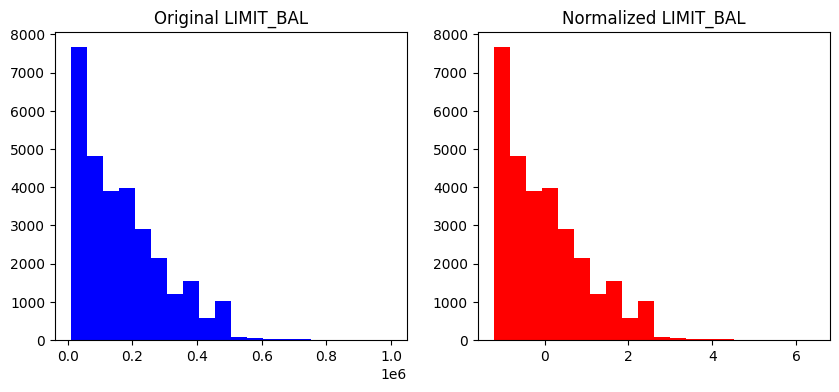

In [ ]:
# Step 3: Data Normalization
# Normalize numerical features (e.g., LIMIT_BAL)
normalizer = StandardScaler()

# LIMIT_BAL = (LIMIT_BAL - mean) / std (Z-Score Normalization)
cleaned_data['LIMIT_BAL_norm'] = normalizer.fit_transform(cleaned_data[['LIMIT_BAL']])
# [['LIMIT_BAL']] uses double square brackets to keep it as a DataFrame (not a Series), 
# which is required by StandardScaler.


# Visualization of Scaling Effect
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(cleaned_data['LIMIT_BAL'], bins=20, color='blue')
plt.title('Original LIMIT_BAL')

plt.subplot(1, 2, 2)
plt.hist(cleaned_data['LIMIT_BAL_norm'], bins=20, color='red')
plt.title('Normalized LIMIT_BAL')
plt.show()


In [31]:
# Step 4: Encoding Categorical Variables
# Define categorical columns
category_features = ['SEX', 'EDUCATION', 'MARRIAGE']
encoder = OneHotEncoder(drop='first', sparse_output=False)
transformed_features = encoder.fit_transform(cleaned_data[category_features])


# Convert to DataFrame
encoded_frame = pd.DataFrame(transformed_features, columns=encoder.get_feature_names_out(category_features))
processed_data = pd.concat([cleaned_data.drop(columns=category_features), encoded_frame], axis=1)

print("\nAfter encoding categorical columns:")
print(processed_data.head())



After encoding categorical columns:
   ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   1    20000.0   24      2      2     -1     -1     -2     -2     3913.0   
1   2   120000.0   26     -1      2      0      0      0      2     2682.0   
2   3    90000.0   34      0      0      0      0      0      0    29239.0   
3   4    50000.0   37      0      0      0      0      0      0    46990.0   
4   5    50000.0   57     -1      0     -1      0      0      0     8617.0   

   ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0  ...    1.0          0.0          1.0          0.0          0.0   
1  ...    1.0          0.0          1.0          0.0          0.0   
2  ...    1.0          0.0          1.0          0.0          0.0   
3  ...    1.0          0.0          1.0          0.0          0.0   
4  ...    0.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0          0.

In [32]:

# Step 5: Feature Engineering
# Drop redundant column (e.g., ID)
refined_data = processed_data.drop(columns=['ID'])

# Create a new feature: PAYMENT_RATIO
refined_data['PAYMENT_RATIO'] = refined_data['PAY_AMT1'] / (refined_data['BILL_AMT1'] + 1e-6)  # Avoid division by zero



In [33]:
# Step 6: Splitting Data
predictors = refined_data.drop(columns=['default.payment.next.month'])
target = refined_data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

print(f"\nTraining Size: {X_train.shape[0]}, Testing Size: {X_test.shape[0]}")


Training Size: 24000, Testing Size: 6000


In [34]:


# Step 7: Summary of Data Preprocessing
print("""
Summary:
1. Loaded and analyzed the dataset.
2. Managed missing data by removing incomplete rows.
3. Applied scaling to 'LIMIT_BAL' for normalization.
4. Converted categorical variables into numerical format via one-hot encoding.
5. Dropped irrelevant columns (ID) and created a new feature (PAYMENT_RATIO).
6. Split dataset into training and testing sets.

These steps ensure better data quality, reducing bias and enhancing model performance.
""")


Summary:
1. Loaded and analyzed the dataset.
2. Managed missing data by removing incomplete rows.
3. Applied scaling to 'LIMIT_BAL' for normalization.
4. Converted categorical variables into numerical format via one-hot encoding.
5. Dropped irrelevant columns (ID) and created a new feature (PAYMENT_RATIO).
6. Split dataset into training and testing sets.

These steps ensure better data quality, reducing bias and enhancing model performance.

